In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from copy import deepcopy
from sklearn import preprocessing
from sklearn import datasets
import pandas as pd
import numpy as np
from pandas import ExcelWriter
print("Starting reading data...")
data = pd.read_excel('datasets/MASTER_DATASET.xlsx')


dictio ={'California': 39144818,
'Texas': 27469114,
'Florida':20271272,
'New York': 19795791,
'Illinois':12859995,
'Pennsylvania':12802503,
'Ohio':11613423,
'Georgia':10214860,
'North Carolina':10042802,
'Michigan':9922576,
'New Jersey':8958013,
'Virginia':8382993,
'Washington':7170351,
'Arizona':6828065,
'Massachusetts':6794422,
'Indiana':6619680,
'Tennessee':6600299,
'Missouri':6083672,
'Maryland':6006401,
'Wisconsin':5771337,
'Minnesota':5489594,
'Colorado':5456574,
'South Carolina':4896146,
'Alabama':4858979,
'Louisiana':4670724,
'Kentucky':4425092,
'Oregon':4028977,
'Oklahoma':3911338,
'Connecticut':3590886,
'Iowa':3123899,
'Utah':2995919,
'Mississippi':2992333,
'Arkansas':2978204,
'Kansas':2911641,
'Nevada':2890845,
'New Mexico':2085109,
'Nebraska':1896190,
'West Virginia':1844128,
'Idaho':1654930,
'Hawaii':1431603,
'New Hampshire':1330608,
'Maine':1329328,
'Rhode Island':1056298,
'Montana':1032949,
'Delaware':945934,
'South Dakota':858469,
'North Dakota':756927,
'Alaska':738432,
'Vermont':626042,
'Wyoming':586107,
'District of Columbia': 693972}

data



Starting reading data...


,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,male,female,...,drug_involvement,suicide,officer_involved,accidental,dgu_evidence,gang_involvement,adults_involved,children_involved,teens_involved,state_population
0,95289,1401,Michigan,Muskegon,0,0,43.230100,-86.251400,0,1,...,0,0,0,0,0,0,1,0,0,9922576
1,92401,1401,New Jersey,Newark,0,0,40.741700,-74.169500,1,0,...,0,0,1,0,0,0,1,0,0,8958013
2,92383,1401,New York,Queens,1,0,40.703400,-73.747400,1,0,...,0,1,0,1,0,0,1,0,0,19795791
3,92142,1401,New York,Brooklyn,0,1,40.671500,-73.947600,1,0,...,0,0,0,0,0,0,1,0,0,19795791
4,95261,1401,Missouri,Springfield,0,1,37.264600,-93.300700,0,1,...,0,0,0,0,0,0,0,1,1,6083672
5,92272,1401,Georgia,Columbus,0,1,32.484800,-84.972700,1,0,...,0,0,0,0,0,0,1,0,0,10214860
6,92428,1401,New York,Syracuse,0,1,43.030800,-76.156200,1,0,...,0,0,0,0,0,0,1,0,0,19795791
7,94205,1401,Kentucky,Lexington,0,0,38.053000,-84.492800,1,0,...,0,0,0,0,0,0,1,0,0,4425092
8,92218,1401,Georgia,Bibb County,0,1,32.786600,-83.719900,1,0,...,0,0,0,0,0,0,1,0,0,10214860
9,104905,1401,Virginia,Prince William County,0,1,38.776500,-77.499600,1,0,...,0,0,0,0,0,0,1,0,0,8382993


In [98]:
#groupby_city = data['state'].groupby(data['n_killed'])
#groupby_city.describe()
#meeste non-dodelijke incidenten in illinois,
#meeste dodelijke incidenten in california
#newDF = pd.DataFrame()
#newDF["states"] = 


In [169]:
groupby_state1 = data['n_killed'].groupby(data['state'])
n_killed = groupby_state1.describe()
groupby_state2 = data['n_injured'].groupby(data['state'])
n_injured = groupby_state2.describe()
n_injured
groupby_state3 = data.groupby(data['state'])
state = groupby_state3.describe()
state
pd.options.display.max_columns = None
display(state)

state["state_population"]["mean"]

accidental                                               \
                          count      mean       std  min  25%  50%  75%  max   
state                                                                          
Alabama                  5469.0  0.324374  0.468183  0.0  0.0  0.0  1.0  1.0   
Alaska                   1349.0  0.203855  0.403012  0.0  0.0  0.0  0.0  1.0   
Arizona                  2323.0  0.441670  0.496693  0.0  0.0  0.0  1.0  1.0   
Arkansas                 2842.0  0.261436  0.439494  0.0  0.0  0.0  1.0  1.0   
California              16267.0  0.321633  0.467117  0.0  0.0  0.0  1.0  1.0   
Colorado                 3198.0  0.252971  0.434782  0.0  0.0  0.0  1.0  1.0   
Connecticut              3064.0  0.119452  0.324372  0.0  0.0  0.0  0.0  1.0   
Delaware                 1682.0  0.125446  0.331322  0.0  0.0  0.0  0.0  1.0   
District of Columbia     3189.0  0.135466  0.342274  0.0  0.0  0.0  0.0  1.0   
Florida                 15016.0  0.240011  0.427104  0.0  0.0  0.0  0.0  1.0   
Georgia                  8919.0  0.267631  0.442749  0.0  0.0  0.0  1.0  1.0   
Hawaii                    289.0  0.217993  0.413599  0.0  0.0  0.0  0.0  1.0   
Idaho                     661.0  0.273828  0.446259  0.0  0.0  0.0  1.0  1.0   
Illinois                17538.0  0.190558  0.392752  0.0  0.0  0.0  0.0  1.0   
Indiana                  5845.0  0.270488  0.444250  0.0  0.0  0.0  1.0  1.0   
Iowa                     2517.0  0.132698  0.339315  0.0  0.0  0.0  0.0  1.0   
Kansas                   2141.0  0.261093  0.439333  0.0  0.0  0.0  1.0  1.0   
Kentucky                 4154.0  0.247472  0.431595  0.0  0.0  0.0  0.0  1.0   
Louisiana                8094.0  0.255004  0.435890  0.0  0.0  0.0  1.0  1.0   
Maine                     907.0  0.130099  0.336598  0.0  0.0  0.0  0.0  1.0   
Maryland                 5793.0  0.272570  0.445320  0.0  0.0  0.0  1.0  1.0   
Massachusetts            5981.0  0.084434  0.278061  0.0  0.0  0.0  0.0  1.0   
Michigan                 6122.0  0.254329  0.435519  0.0  0.0  0.0  1.0  1.0   
Minnesota                2406.0  0.190357  0.392665  0.0  0.0  0.0  0.0  1.0   
Mississippi              3597.0  0.312483  0.463570  0.0  0.0  0.0  1.0  1.0   
Missouri                 6621.0  0.306902  0.461243  0.0  0.0  0.0  1.0  1.0   
Montana                   638.0  0.235110  0.424400  0.0  0.0  0.0  0.0  1.0   
Nebraska                 1650.0  0.154545  0.361580  0.0  0.0  0.0  0.0  1.0   
Nevada                   1951.0  0.379293  0.485335  0.0  0.0  0.0  1.0  1.0   
New Hampshire             964.0  0.122407  0.327925  0.0  0.0  0.0  0.0  1.0   
New Jersey               5373.0  0.209566  0.407037  0.0  0.0  0.0  0.0  1.0   
New Mexico               1643.0  0.269020  0.443585  0.0  0.0  0.0  1.0  1.0   
New York                 9696.0  0.176361  0.381147  0.0  0.0  0.0  0.0  1.0   
North Carolina           8727.0  0.244643  0.429900  0.0  0.0  0.0  0.0  1.0   
North Dakota              573.0  0.184991  0.388630  0.0  0.0  0.0  0.0  1.0   
Ohio                    10234.0  0.243697  0.429333  0.0  0.0  0.0  0.0  1.0   
Oklahoma                 3449.0  0.257466  0.437302  0.0  0.0  0.0  1.0  1.0   
Oregon                   2286.0  0.191601  0.393647  0.0  0.0  0.0  0.0  1.0   
Pennsylvania             8909.0  0.258839  0.438022  0.0  0.0  0.0  1.0  1.0   
Rhode Island              893.0  0.072788  0.259934  0.0  0.0  0.0  0.0  1.0   
South Carolina           6934.0  0.225699  0.418072  0.0  0.0  0.0  0.0  1.0   
South Dakota              544.0  0.205882  0.404717  0.0  0.0  0.0  0.0  1.0   
Tennessee                7616.0  0.236213  0.424783  0.0  0.0  0.0  0.0  1.0   
Texas                   13566.0  0.339157  0.473441  0.0  0.0  0.0  1.0  1.0   
Utah                     1071.0  0.271709  0.445048  0.0  0.0  0.0  1.0  1.0   
Vermont                   472.0  0.156780  0.363979  0.0  0.0  0.0  0.0  1.0   
Virginia                 5943.0  0.236749  0.425123  0.0  0.0  0.0  0.0  1.0   
Washington           

state
Alabama                 0.021942
Alaska                  0.085248
Arizona                 0.046492
Arkansas                0.032372
California              0.062888
Colorado                0.076298
Connecticut             0.156658
Delaware                0.131986
District of Columbia    0.003763
Florida                 0.066729
Georgia                 0.063460
Hawaii                  0.069204
Idaho                   0.133132
Illinois                0.037233
Indiana                 0.097861
Iowa                    0.110052
Kansas                  0.071929
Kentucky                0.068609
Louisiana               0.056832
Maine                   0.143330
Maryland                0.103746
Massachusetts           0.163016
Michigan                0.055701
Minnesota               0.073150
Mississippi             0.015569
Missouri                0.066304
Montana                 0.086207
Nebraska                0.096970
Nevada                  0.043055
New Hampshire           0.150415
New 

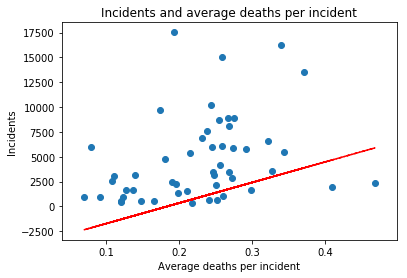

In [185]:
#Alle aankomende grafieken zijn per staat ingedeeld,
#elk datapunt is een staat, dus elke grafiek heeft 51 datapunten.
#
plt.scatter(n_killed['mean'], n_killed['count'])
z = np.polyfit(n_killed['mean'], n_killed['count'], 1)
plt.plot(n_killed['mean'],p(n_killed['mean']),"r--")
plt.ylabel('Incidents')
plt.xlabel('Average deaths per incident')
plt.title('Incidents and average deaths per incident')
p = np.poly1d(z)
plt.show()

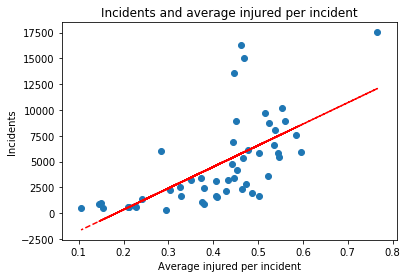

In [184]:
plt.scatter(n_injured['mean'], n_injured['count'])
z = np.polyfit(n_injured['mean'], n_injured['count'], 1)
p = np.poly1d(z)
plt.plot(n_injured['mean'],p(n_injured['mean']),"r--")
plt.ylabel('Incidents')
plt.xlabel('Average injured per incident')
plt.title('Incidents and average injured per incident')
plt.show()

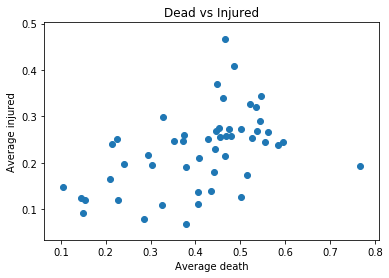

In [193]:
plt.scatter(n_injured['mean'], n_killed['mean'])
#z = np.polyfit(n_injured['mean'], n_killed['mean'], 1)
#plt.plot(n_injured['mean'],p(n_injured['mean']),"r--")
#p = np.poly1d(z)
plt.ylabel('Average injured')
plt.xlabel('Average death')
plt.title('Dead vs Injured')
plt.show()

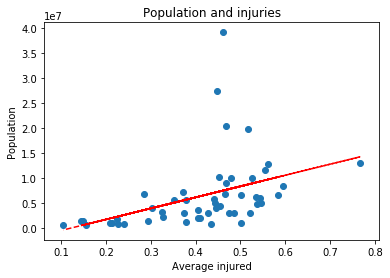

In [194]:
plt.scatter(n_injured['mean'], state["state_population"]["mean"])
z = np.polyfit(n_injured['mean'], state["state_population"]["mean"], 1)
p = np.poly1d(z)
plt.plot(n_injured['mean'],p(n_injured['mean']),"r--")
plt.ylabel('Population')
plt.xlabel('Average injured')
plt.title('Population and injuries')
plt.show()

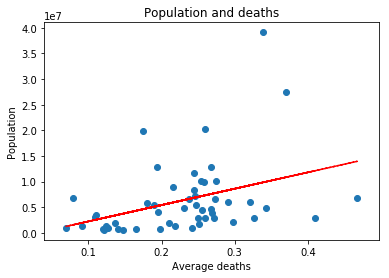

In [195]:
plt.scatter(n_killed['mean'], state["state_population"]["mean"])
z = np.polyfit(n_killed['mean'], state["state_population"]["mean"], 1)
p = np.poly1d(z)
plt.plot(n_killed['mean'],p(n_killed['mean']),"r--")
plt.ylabel('Population')
plt.xlabel('Average deaths')
plt.title('Population and deaths')
plt.show()

(6012, 4931, 5616, 4357, 4810, 4861, 5245, 5092, 4742, 4765, 4822, 4898)
(10902, 8375, 10400, 8855, 10143, 9666, 11148, 10725, 9656, 9675, 8999, 8879)


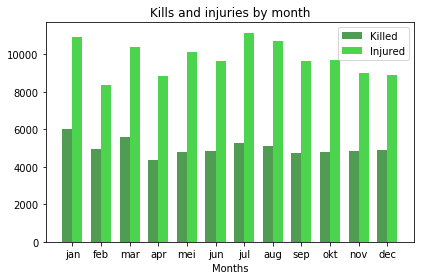

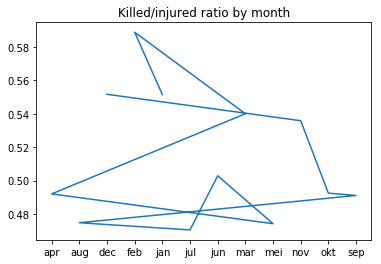

In [182]:
jan_killed = 0
feb_killed = 0
mar_killed= 0
apr_killed = 0
mei_killed = 0
jun_killed = 0
jul_killed = 0
aug_killed = 0
sep_killed = 0
okt_killed = 0
nov_killed = 0
dec_killed = 0

jan_injured = 0
feb_injured = 0
mar_injured= 0
apr_injured = 0
mei_injured = 0
jun_injured = 0
jul_injured = 0
aug_injured = 0
sep_injured = 0
okt_injured = 0
nov_injured = 0
dec_injured = 0

for date, killed, injured in zip(data["date"], data["n_killed"], data["n_injured"]):
    date = str(date)
    if "01" in date:
        jan_killed = jan_killed+killed
        jan_injured = jan_injured+injured
    if "02" in date:
        feb_killed = feb_killed+killed
        feb_injured = feb_injured+injured
    if "03" in date:
        mar_killed = mar_killed+killed
        mar_injured = mar_injured+injured
    if "04" in date:
        apr_killed = apr_killed+killed
        apr_injured = apr_injured+injured
    if "05" in date:
        mei_killed = mei_killed+killed
        mei_injured = mei_injured+injured
    if "06" in date:
        jun_killed = jun_killed+killed
        jun_injured= jun_injured+injured
    if "07" in date:
        jul_killed=jul_killed+killed
        jul_injured = jul_injured+injured
    if "08" in date:
        aug_killed=aug_killed+killed
        aug_injured = aug_injured+injured
    if "09" in date:
        sep_killed=sep_killed+killed
        sep_injured = sep_injured+injured
    if "10" in date:
        okt_killed=okt_killed+killed
        okt_injured = okt_injured+injured
    if "11" in date:
        nov_killed=nov_killed+killed
        nov_injured = nov_injured+injured
    if "12" in date:
        dec_killed=dec_killed+killed
        dec_injured = dec_injured+injured



#plot graph
n_groups = 12
killed = (jan_killed, feb_killed, mar_killed, apr_killed, mei_killed,jun_killed,jul_killed, aug_killed, sep_killed, okt_killed, nov_killed, dec_killed)
injured = (jan_injured, feb_injured, mar_injured, apr_injured, mei_injured, jun_injured, jul_injured, aug_injured, sep_injured, okt_injured, nov_injured, dec_injured )
print(killed)
print(injured)
ratio_list = [(killed*1.0)/injured for killed, injured in zip(killed, injured)]
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, killed, bar_width,
                 alpha=opacity,
                 color='#268328',
                 label='Killed')

rects2 = plt.bar(index + bar_width, injured, bar_width,
                 alpha=opacity,
                 color='#20CA23',
                 label='Injured')

plt.xlabel('Months')
plt.title('Kills and injuries by month')
plt.xticks(index + bar_width/2, ('jan','feb','mar','apr','mei','jun','jul','aug','sep','okt','nov','dec'))
plt.legend()

plt.tight_layout()
plt.show()

#plot graph

fig = plt.figure()
objects = ['jan','feb','mar','apr','mei','jun','jul','aug','sep','okt','nov','dec']
plt.plot(objects, ratio_list)
plt.title('Killed/injured ratio by month')
plt.show()

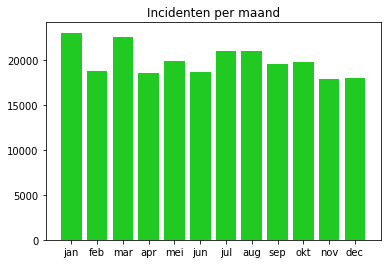

In [9]:
jan = 0
feb = 0
mar= 0
apr = 0
mei = 0
jun = 0
jul = 0
aug = 0
sep = 0
okt = 0
nov = 0
dec = 0
for date in data["date"]:
    date = str(date)
    if "01" in date:
        jan = jan+1
    if "02" in date:
        feb = feb+1
    if "03" in date:
        mar = mar+1
    if "04" in date:
        apr = apr+1
    if "05" in date:
        mei = mei+1
    if "06" in date:
        jun = jun+1
    if "07" in date:
        jul=jul+1
    if "08" in date:
        aug=aug+1
    if "09" in date:
        sep=sep+1
    if "10" in date:
        okt=okt+1
    if "11" in date:
        nov=nov+1
    if "12" in date:
        dec=dec+1


#plot graph
fig = plt.figure()
objects = ('jan','feb','mar','apr','mei','jun','jul','aug','sep','okt','nov','dec')
y_pos = np.arange(len(objects))
performance = [jan, feb, mar, apr, mei, jun, jul, aug, sep, okt, nov, dec]
plt.bar(y_pos, performance, align='center', color='#20CA23')
plt.xticks(y_pos, objects)
plt.title('Incidenten per maand')
plt.draw()